<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/02_Visualization_with_hierarchical_clustering_%26_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Clustering for dataset exploration Visualization with hierarchical clustering and t-SNE</h1> 
</strong>

---


In this Notebook, we'll learn about two unsupervised learning techniques for data visualization,** hierarchical clustering** and **t-SNE**.

- **Hierarchical clustering** merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy.

- **t-SNE** maps the data samples into **2d space** so that ***the proximity of the samples to one another can be visualized***.

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 2310 (delta 17), reused 100 (delta 6), pack-reused 2186
Receiving objects: 100% (2310/2310), 276.16 MiB | 31.89 MiB/s, done.
Resolving deltas: 100% (795/795), done.
Checking out files: 100% (1004/1004), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#plt.style.use('ggplot')
sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset


In [4]:
ls

 company-stock-movements-2010-2015-incl.csv  'Musical artists'/
 eurovision-2016.csv                          new_points.csv
 fish.csv                                     points.csv
 Grains/                                     'Wikipedia articles'/
 lcd-digits.csv                               wine.csv


## Visualizing hierarchies
- Visualizations communicate insight
    - 't-SNE': Creates a 2D map of a dataset
    - 'Hierarchical clustering'
- A hierarchy of groups
    - Groups of living things can form a hierarchy
    - Cluster are contained in one another
- Hierarchical clustering
    - Every element begins in a separate cluster
    - At each step, the two closest clusters are merged
    - Continue until all elements in a single cluster
    - This is **"agglomerative"(or divisive)** hierarchical clustering

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy ```linkage()``` function performs hierarchical clustering on an array of samples. Use the ```linkage()``` function to obtain a hierarchical clustering of the grain samples, and use ```dendrogram()``` to visualize the result. A sample of the grain measurements is provided in the array ```samples```, while the variety of each grain sample is given by the list ```varieties```.

#### Preprocess

In [5]:
df = pd.read_csv('Grains/seeds.csv', header=None)
df[7] = df[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [6]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

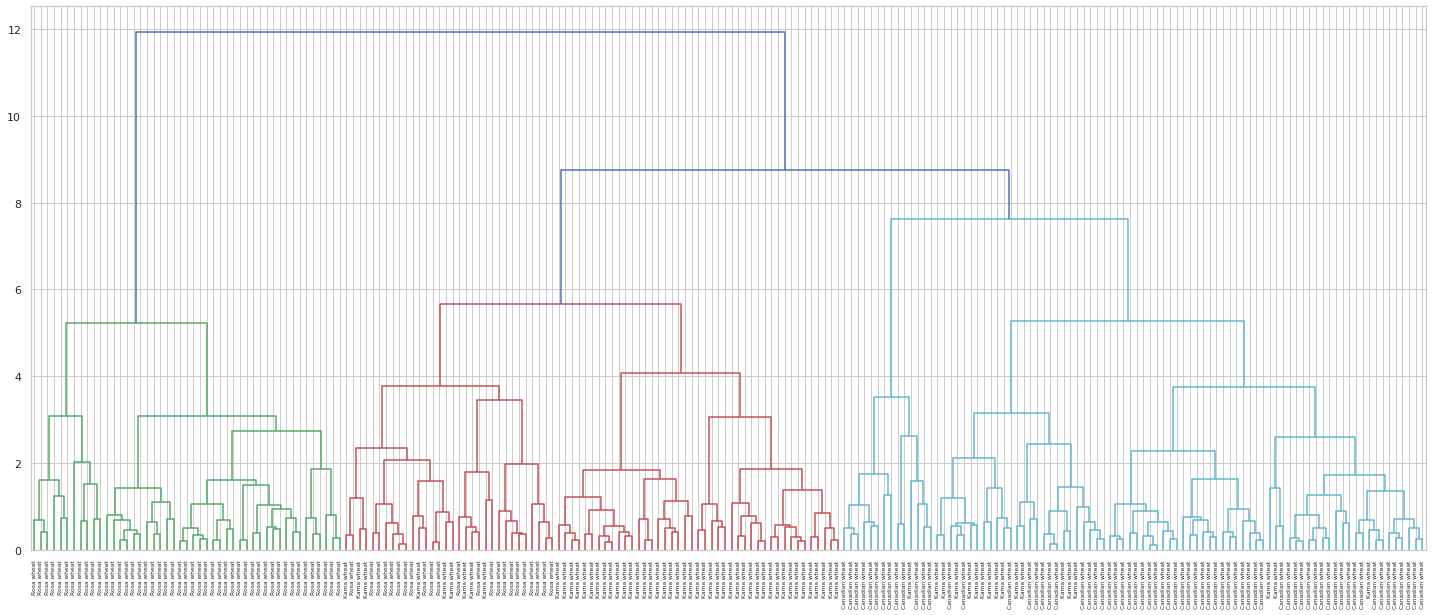

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(25, 10))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6);

### Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements ```movements```, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the ```normalize()``` function from ```sklearn.preprocessing``` instead of ```Normalizer```.

#### Preprocess

In [8]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,2010-03-02,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,-1.079998,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,-0.899999,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,0.519997,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,0.270000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000

In [9]:
movements = df.values
companies = df.index.values

{'color_list': ['g',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'r',
  'r',
  'r',
  'b',
  'c',
  'm',
  'm',
  'b',
  'b',
  'b',
  'y',
  'y',
  'b',
  'b',
  'k',
  'k',
  'k',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'g',
  'b',
  'b',
  'b',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.8766150964619028, 0.8766150964619028, 0.0],
  [0.0, 1.005249626515007, 1.005249626515007, 0.8766150964619028],
  [0.0, 1.0405854841254665, 1.0405854841254665, 0.0],
  [0.0, 0.9756642737984944, 0.9756642737984944, 0.0],
  [0.0, 1.0443532462900016, 1.0443532462900016, 0.9756642737984944],
  [1.0405854841254665,
   1.108770686753804,
   1.108770686753804,
   1.0443532462900016],
  [1.005249626515007,
   1.1539599583553477,
   1.1539599583553477,
   1.108770686753804],
  [0.0, 1.1953921911777048, 1.1953921911777048, 1.1539599583553477],
  [0.0, 1.067

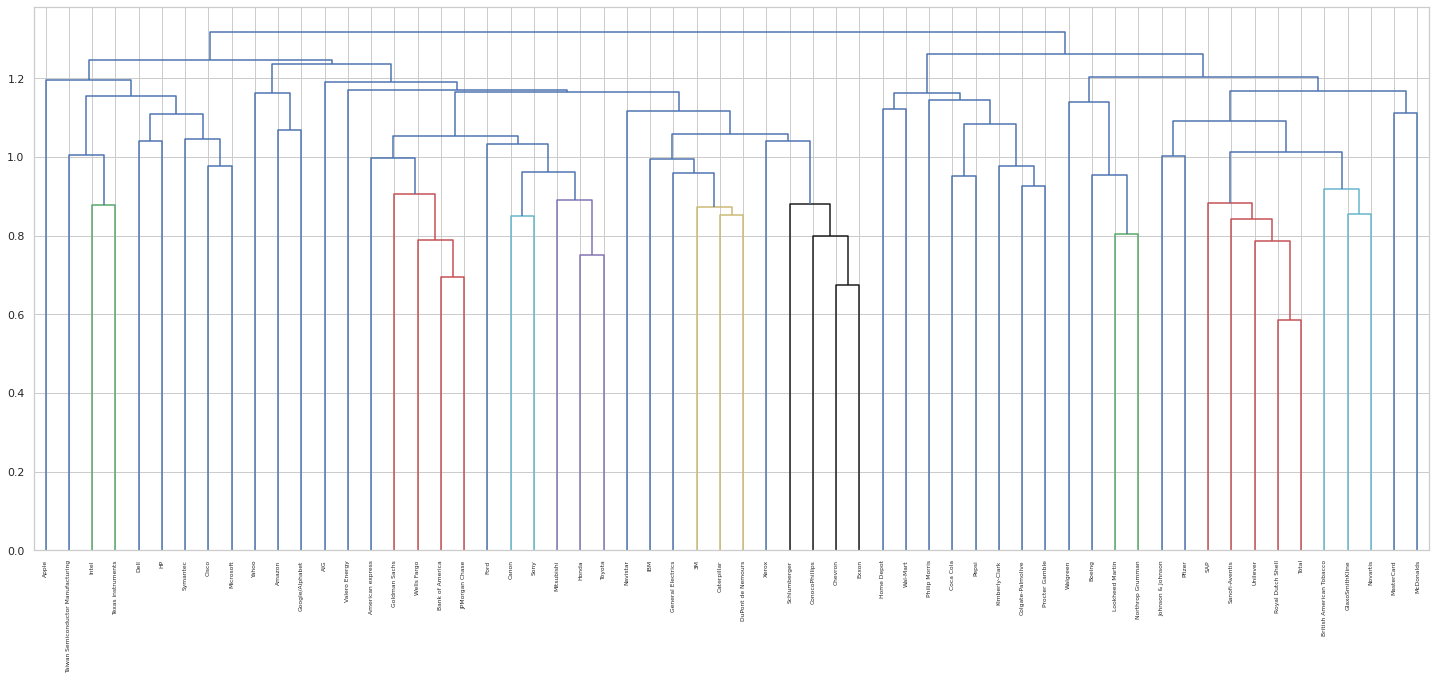

In [10]:
from sklearn.preprocessing import normalize

# Normalize the movements: normalize_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(mergings, 
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)

## Cluster labels in hierarchical clustering
- Intermediate clusterings & height on dendrogram
    - Height on dendrogram specifies max. distance between merging clusters
    - Don't merge clusters further apart than this.
- Distance between clusters
    - Defined by "linkage method"
    - In "complete" linkage: distance between clusters is max. distance between their samples
    - Different linkage method, different hierarchical clustering

### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using ```'complete'``` linkage. Now, perform a hierarchical clustering of the voting countries with ```'single'``` linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array ```samples```. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list ```country_names``` gives the name of each voting country. This dataset was obtained from [Eurovision](http://www.eurovision.tv/page/results).

#### Preprocess


In [11]:
df = pd.read_csv('eurovision-2016.csv')
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


In [12]:
samples = df.iloc[:, 2:7].values[:42]
country_names = df.iloc[:, 1].values[:42]

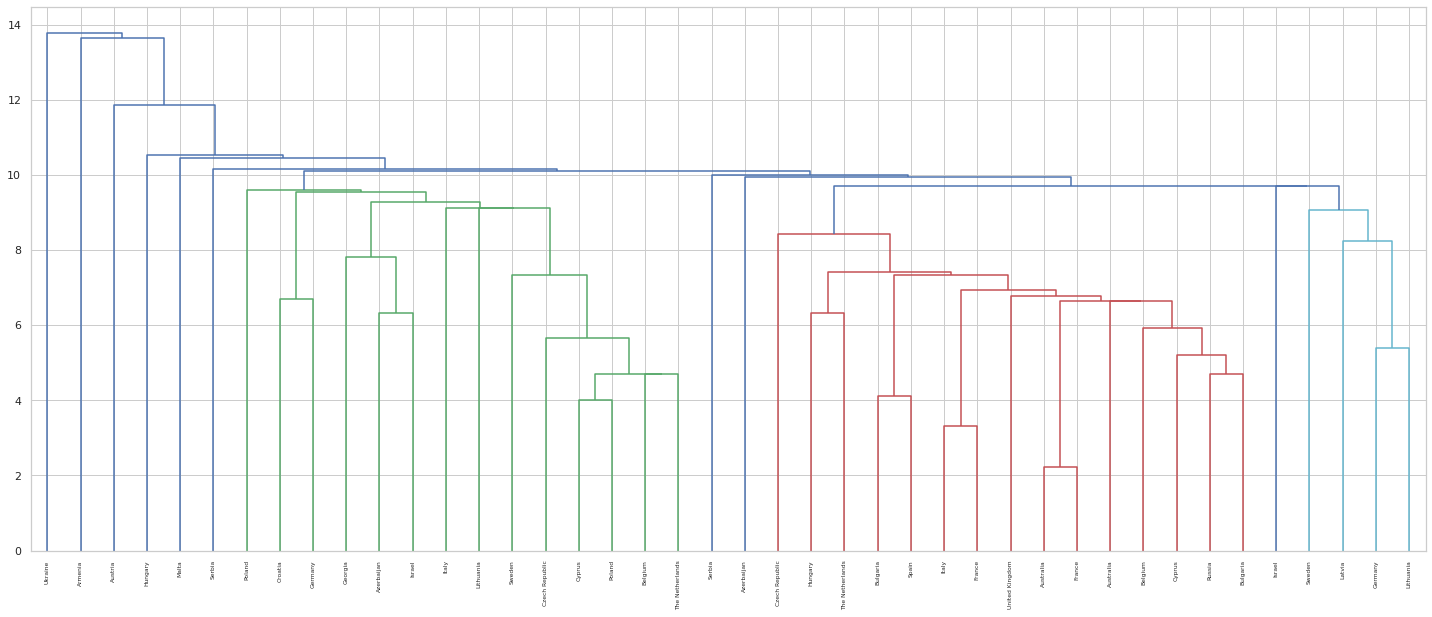

In [13]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90, 
           leaf_font_size=6); # placing this `;` at the end  this will reander the graph only

### Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the ```fcluster()``` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

#### Preprocess

In [14]:
df = pd.read_csv('Grains/seeds.csv', header=None)
df[7] = df[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [15]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

In [16]:
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method='complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


## t-SNE for 2-dimensional maps
- t-SNE for 2-dimensional maps
    - t-SNE = "t-distributed stochastic neighbor embedding"
    - Maps samples to 2D space (or 3D)
    - Map approximately preserves nearness of samples
    - Great for inspecting dataset

### t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot.

### Preprocess

In [17]:
df = pd.read_csv('Grains/seeds.csv', header=None)

samples = df.iloc[:, :-1].values
variety_numbers = df.iloc[:, -1].values

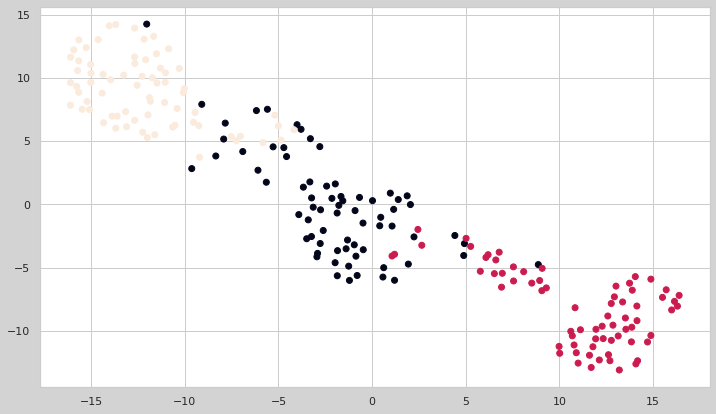

In [18]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1st feature: ys
ys = tsne_features[:, 1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(12, 7), facecolor='lightgrey')
plt.scatter(xs, ys, c=variety_numbers)

```python
plt.savefig('../images/tsne-scatter.png')
```

### A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array ```normalized_movements``` (these have already been normalized for you). The list ```companies``` gives the name of each company.

#### Preprocess

In [19]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
movements = df.values
companies = df.index.values
normalized_movements = normalize(movements)

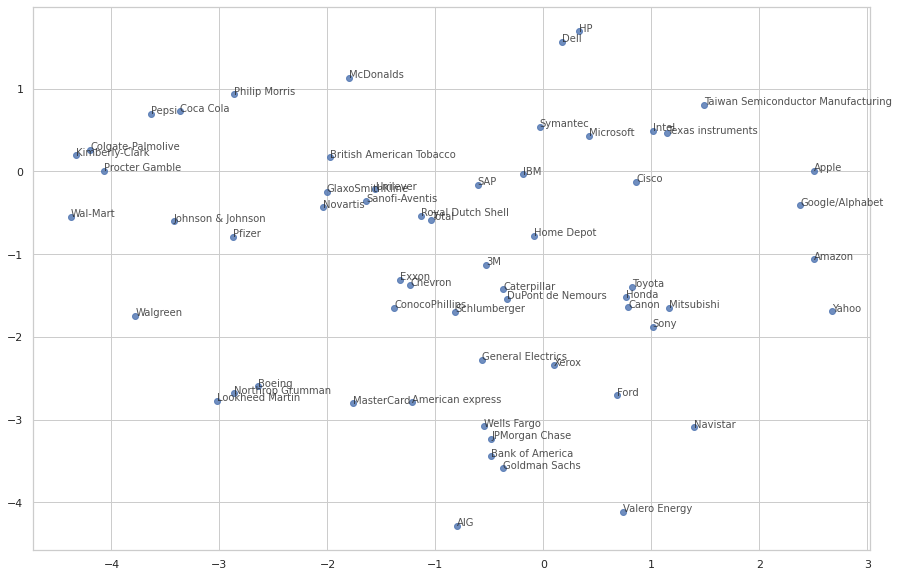

In [20]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1st feature: ys
ys = tsne_features[:, 1]

# Scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(xs, ys, alpha=0.8)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.8)